In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from matplotlib.pyplot import plasma
warnings.filterwarnings('ignore')

In [3]:

df =pd.read_csv("Telco_Customer_Churn_Dataset  (3).csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
from sklearn.preprocessing import LabelEncoder

# Drop customerID (not useful for prediction)
df.drop('customerID', axis=1, inplace=True)


In [11]:
# Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


In [12]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [13]:
df.rename(columns={'gender': 'is_male'}, inplace=True)
df.rename(columns={'SeniorCitizen': 'is_SeniorCitizen'}, inplace=True)
df.rename(columns={'Partner': 'have_Partner'}, inplace=True)
df.rename(columns={'PhoneService': 'has_PhoneService'}, inplace=True)


In [14]:
df.head()

,is_male,is_SeniorCitizen,have_Partner,Dependents,tenure,has_PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [15]:
#split data for training and testing data
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Overall Churn Rate: 0.2653698707936959


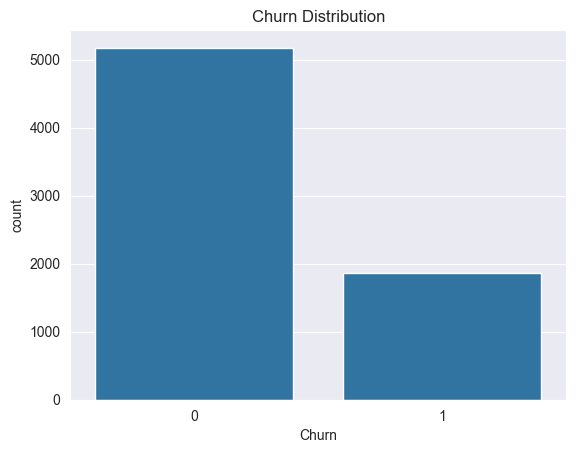

In [16]:
churn_rate = y.mean()
print("Overall Churn Rate:", churn_rate)
#way to calculate churn rate
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

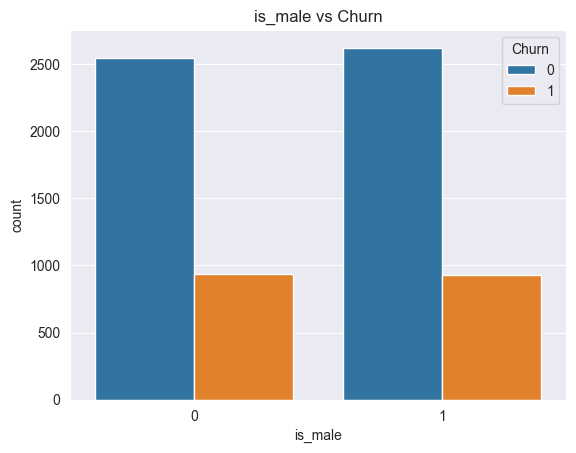

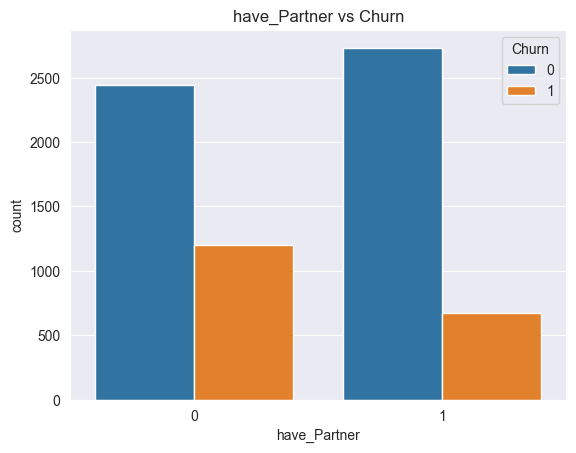

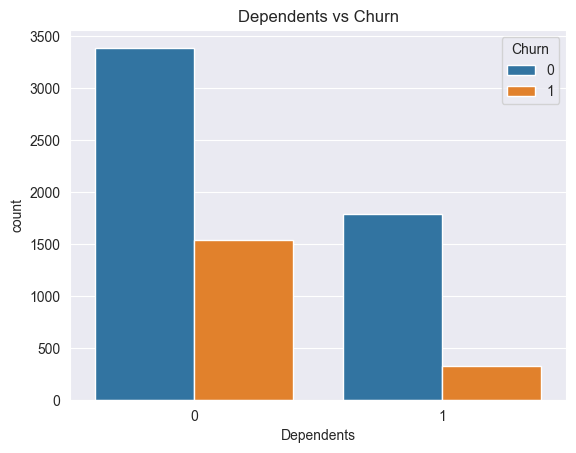

In [17]:
features = ['is_male', 'have_Partner', 'Dependents']

for col in features:
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f"{col} vs Churn")
    plt.show()

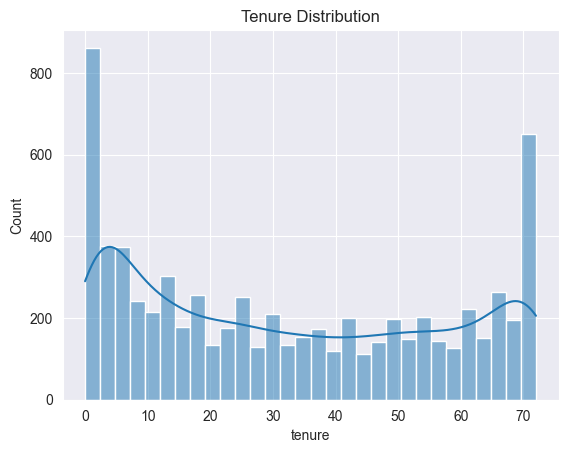

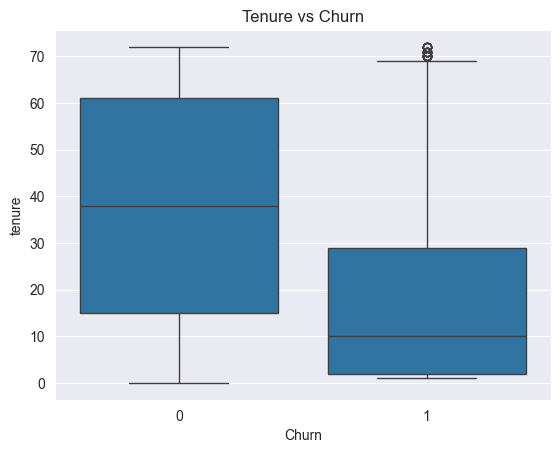

In [18]:
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title("Tenure Distribution")#Sets the title of the graph
plt.show()

sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()


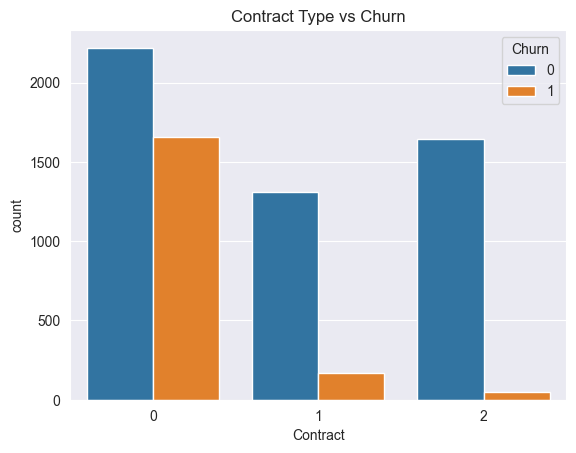

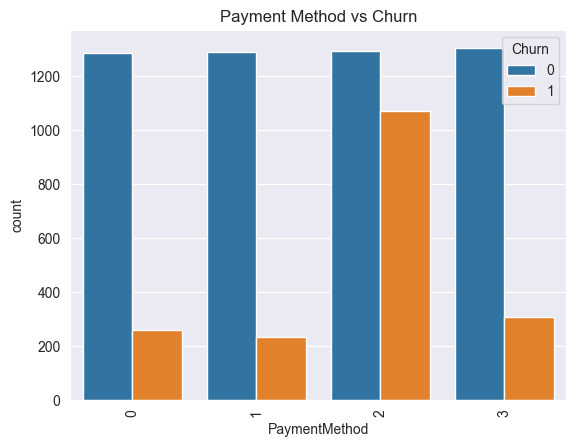

In [19]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Contract Type vs Churn")
plt.show()

sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.xticks(rotation=90)
plt.title("Payment Method vs Churn")
plt.show()


In [20]:
# Tenure segmentation
df['TenureGroup'] = pd.cut(df['tenure'], bins=[0,12,24,48,72], labels=['0-1yr','1-2yr','2-4yr','4-6yr'])
# Monthly charges segmentation
df['ChargeGroup'] = pd.qcut(df['MonthlyCharges'], 3, labels=['Low','Medium','High'])
# Churn rate per segment
print(df.groupby('TenureGroup')['Churn'].mean())
print(df.groupby('ChargeGroup')['Churn'].mean())


TenureGroup
0-1yr    0.476782
1-2yr    0.287109
2-4yr    0.203890
4-6yr    0.095132
Name: Churn, dtype: float64
ChargeGroup
Low       0.158656
Medium    0.296802
High      0.340861
Name: Churn, dtype: float64


In [21]:
high_value = df[
    (df['ChargeGroup'] == 2) &
    (df['TenureGroup'] == '0-1yr')
]

print("High-value customers at risk:")
print(high_value.shape)


High-value customers at risk:
(0, 22)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.64      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [23]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
print("Decision Tree Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1035
           1       0.49      0.52      0.51       374

    accuracy                           0.73      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.73      0.73      0.73      1409



In [24]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3,5,7,10],
    'min_samples_split': [2,5,10]
}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                    param_grid,
                    cv=5,
                    scoring='f1')


In [25]:
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)
y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))

Best Parameters: {'max_depth': 5, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1035
           1       0.60      0.55      0.58       374

    accuracy                           0.78      1409
   macro avg       0.72      0.71      0.72      1409
weighted avg       0.78      0.78      0.78      1409



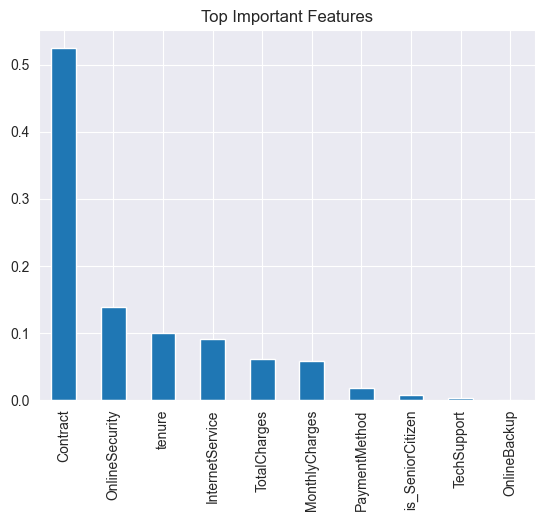

In [26]:
importances = pd.Series(best_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top Important Features")
plt.show()

In [27]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

In [28]:
y_probs = best_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

(0.0, 1.05)

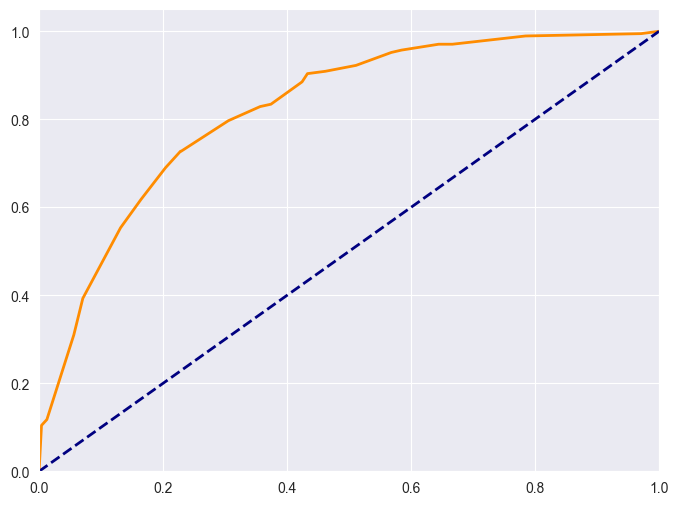

In [29]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])


(0.0, 1.05)

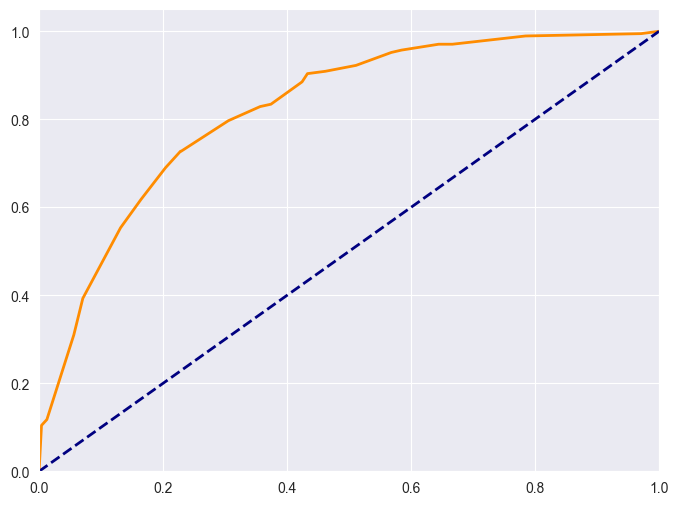

In [30]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

In [31]:
importances = pd.Series(best_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10)


Contract            0.525341
OnlineSecurity      0.138973
tenure              0.099174
InternetService     0.091187
TotalCharges        0.060525
MonthlyCharges      0.057434
PaymentMethod       0.018331
is_SeniorCitizen    0.006759
TechSupport         0.002142
OnlineBackup        0.000135
dtype: float64

In [32]:
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')

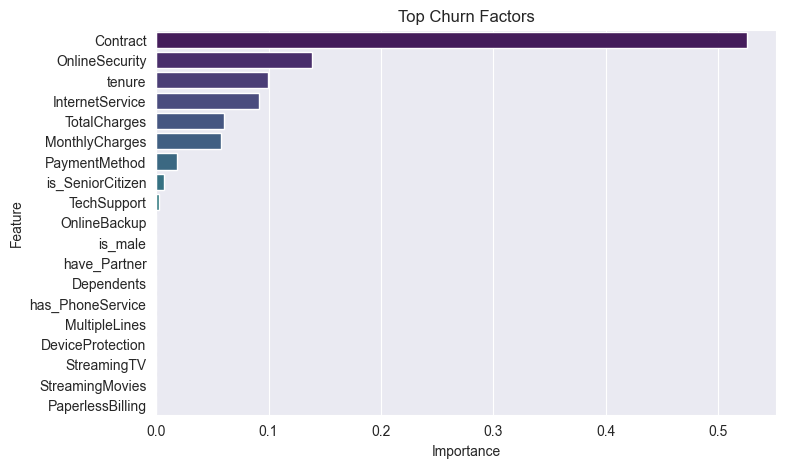

In [33]:
# Corrected feature importance plot
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_  # Use best_model, not model
}).sort_values(by='Importance', ascending=False)

# Bar plot
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=importances, palette='viridis')
plt.title("Top Churn Factors")
plt.show()
